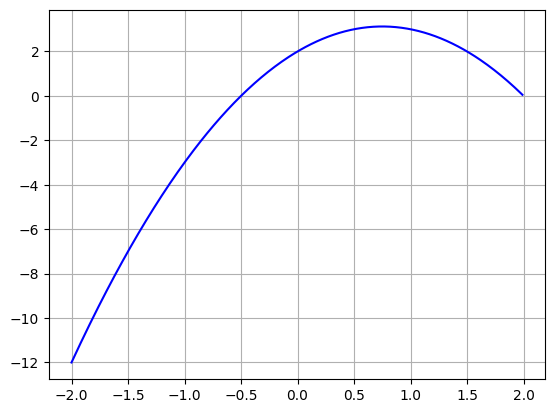

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.utils import data

t_coeffs=torch.tensor([2.0,3.0,-2.0])

def poly_feathures(x,degree):
    return torch.stack([x**i for i in range(degree+1)],dim=1)

def forward(x):
    feats=poly_feathures(x,len(t_coeffs)-1)
    return (feats*t_coeffs).sum(dim=1)

x=torch.arange(-2.0,2.0,0.01)
y=forward(x)

plt.plot(x,y,'b',label="y")
plt.grid()
plt.show()

# batch_size=10
# dataset=data.TensorDataset(x,y)
# #train_iter= data.DataLoader(data.Subset(dataset,range(0,train_num)),batch_size,True)
# train_iter= data.DataLoader(dataset,batch_size,True)
# #test_iter= data.DataLoader(data.Subset(dataset,range(train_num,train_num+test_num)),batch_size,True)
# for x,y in train_iter:
#     print(x.shape)
#     break;




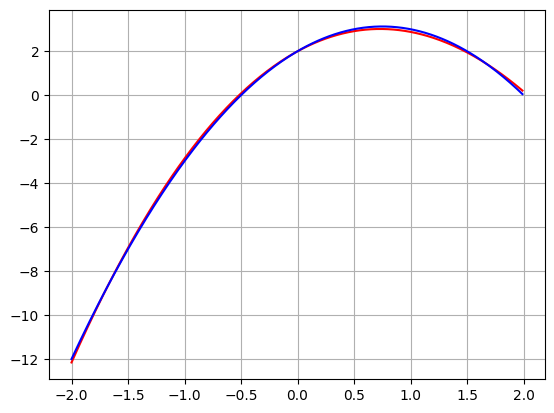

In [82]:
from torch import nn
class PloyModel(nn.Module):
    def __init__(self, degree):
        super(PloyModel,self).__init__()
        self.coffes=nn.Parameter(torch.randn(degree+1),requires_grad=True)
        #self.poly=nn.Linear(degree+1,1,bias=False)
    
    def forward(self,x):
        feats=poly_feathures(x,self.coffes.shape[0]-1)
        a=(self.coffes*feats).sum(dim=1)
        return a


epoch_num=800
net=PloyModel(len(t_coeffs))
loss=nn.MSELoss(reduction="none")
updater=torch.optim.SGD(net.parameters(),lr=0.01)
net.train()
for i in range(epoch_num):
    y_hat=net(x)
    l=loss(y_hat,y)
    updater.zero_grad()
    l.mean().backward()
    updater.step()
net.eval()
with torch.no_grad():
    y_fix=net(x)

plt.plot(x,y_fix,'r',label="fix")
plt.plot(x,y,'b',label="y")
plt.grid()
plt.show()

In [65]:
def test(x,degree):
    return torch.stack([x**i for i in range(degree+1)],dim=1)
 
tx=torch.tensor([2,3])
ty=test(tx,3)
p=torch.tensor([1.0,2.0,3.0,4.0])
print(ty)
print((p*ty).sum(dim=1))

tensor([[ 1,  2,  4,  8],
        [ 1,  3,  9, 27]])
tensor([ 49., 142.])
